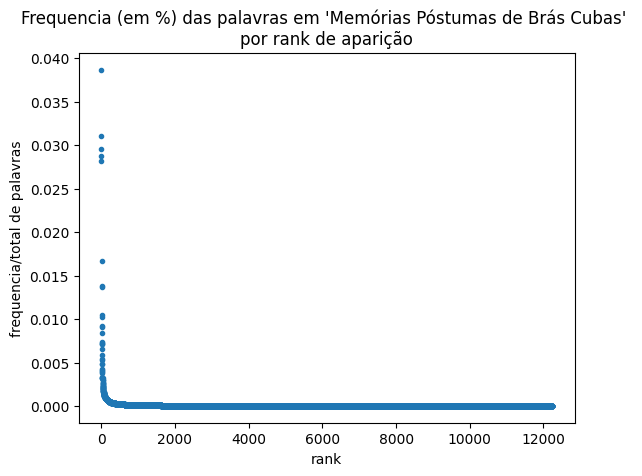

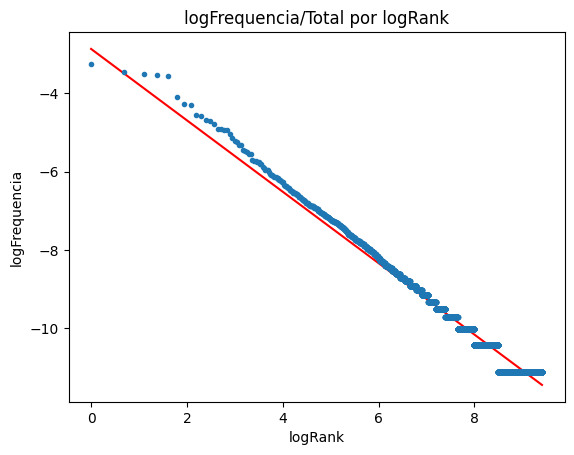

0.0386670669468628 0.9105030153303009


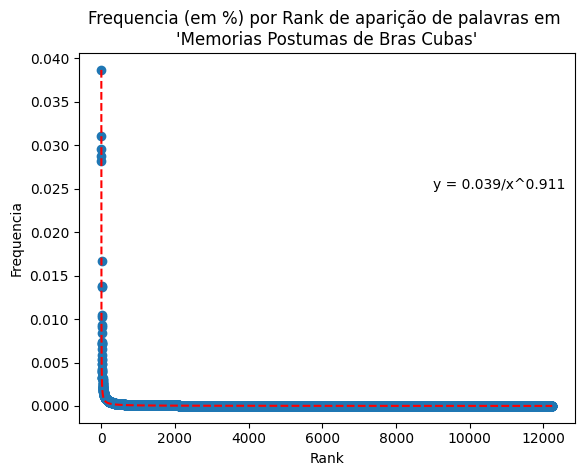

In [61]:
import matplotlib.pyplot as plt
import numpy as np

file = open("saida.txt")
#criando lista [frequencia,palavra]
def cortastr(str):
    start = 0
    result=[]
    for i in range(len(str)):
        if(str[i]==' '):
            value = str[start:i]
            start=i+1
            result.append(value)
    result.append(str[start:])
    result[0]=int(result[0])
    return result
    
#criando lista de [frequencias, palavra]
palavras = []
for linha in file.readlines():
        palavras.append(cortastr(linha.strip()))



# criando lista de [frequencia,palavra,rank]

# rank=1
# palavras[0].append(rank)

# for i in range(1,len(palavras)):
#     if(palavras[i][0]<palavras[i-1][0]):
#         rank+=1
#     palavras[i].append(rank)


rank=1
for i in range(len(palavras)):
    palavras[i].append(rank)
    rank+=1


#mostrar palavras por rank:
x = []
y= []
total_palavras = 0
for palavra in palavras:
    x.append(palavra[2])
    y.append(palavra[0])
    total_palavras+=palavra[0]

for i in range(len(y)):
    y[i]/=total_palavras
    
#GRAFICO FREQ X RANK
plt.plot(x,y,'.')
plt.title("Frequencia (em %) das palavras em 'Memórias Póstumas de Brás Cubas' \npor rank de aparição")
plt.ylabel("frequencia/total de palavras")
plt.xlabel("rank")
plt.show()

# GRAFICO  LOG LOG 

xlogn = [ np.log(i) for i in x ]
ylogn = [ np.log(i) for i in y ]

A = np.matrix([[x,1] for x in xlogn])
b = np.matrix([[y] for y in ylogn])
m,c = np.linalg.lstsq(A,b,rcond=0)[0]

# C = np.exp(c.item(0))
C = palavras[0][0]/total_palavras
s = - m.item(0) 

ys=[xlogn[i]*m.item(0) + c.item(0) for i in range(len(xlogn))]


plt.plot(xlogn,ys,color='red')
plt.plot(xlogn,ylogn,'.')
plt.title("logFrequencia/Total por logRank")
plt.ylabel("logFrequencia")
plt.xlabel("logRank")
plt.show()

y_2 = [C/(i**(s)) for i in x]
print(C,s)
plt.plot(x,y,'o')
plt.plot(x,y_2,color='red',linestyle='dashed')
plt.title("Frequencia (em %) por Rank de aparição de palavras em \n'Memorias Postumas de Bras Cubas'")
plt.ylabel("Frequencia")
plt.xlabel("Rank")
plt.text(9000,0.025,"y = {:.3f}/x^{:.3f}".format(C,s))
plt.show()



In [114]:
h_sm1 = 0
def zipf(i):
    return (C/(i**s))
    
h_s = 0
for i in range(1,len(palavras)+1):
    h_sm1+= 1/(i**(s))
    h_s += 1/(i**s+1)
print("média pelo numero harmonico: ", h_sm1/h_s)


media = 0
for p in palavras:
    media += ((p[0]/total_palavras) * p[2])

print("media ponderada = ", media)

var = 0
for p in palavras:
    var += (p[0] - media)**2 * (p[0]/total_palavras)

print(np.sqrt(var)/total_palavras)






média pelo numero harmonico:  1.081979084955648
media ponderada =  1504.9116481537062
0.0193780357527977
